# Current version : 6.10.a (2024-11-13)

# Libraries and directory (always run)

In [2]:
### import necessary libraries
from datetime import datetime
# import geopandas as gpd
# from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
import numpy as np
import os
import pandas as pd
import progressbar
import random
import seaborn as sns
import scanpy as sc
# import scanpy.external as sce
# from scipy import stats
# from scipy.interpolate import CubicSpline
# from scipy.io import mmread
# from scipy.optimize import curve_fit
# import scipy.sparse as sparse
# from scipy.stats import pearsonr, pointbiserialr
# from shapely.geometry import Polygon, mapping, MultiPolygon
# from shapely.ops import unary_union
# from skimage import measure
from sklearn.cluster import KMeans
# from sklearn.metrics import adjusted_rand_score
# from sklearn.neighbors import NearestNeighbors
# from sklearn.neighbors import KNeighborsClassifier
import warnings

warnings.filterwarnings("ignore") 
sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 1 # errors (0), warnings (1), info (2), hints (3)
plt.rcParams["font.family"] = "Arial"
sns.set_style("white")

start_time = datetime.now()

def print_with_elapsed_time(message):
    elapsed_time = datetime.now() - start_time
    elapsed_seconds = elapsed_time.total_seconds()
    print(f"[{elapsed_seconds:.2f} seconds] {message}")

In [3]:
# print(f"geopandas version: {gpd.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"scanpy version: {sc.__version__}")
# print(f"plt version: {plt.__version__}")

pandas version: 2.0.1
scanpy version: 1.11.1


In [4]:
### Directory where the data is stored

# dir = "/mnt/d/Xenium" #Ubuntu
# dir = "/media/volume/data/spatial/hugo/data" #Ubuntu
# dir = "/media/volume/data/spatial/hugo/data/k5" #Ubuntu
dir = "D:\\Xenium"

# dir_notebook = '/mnt/d/Jupyter_notebook/Xenium_jupyter_notebook'
# dir_notebook = '/media/volume/volume_spatial/hugo/notebook'
dir_notebook = 'D:\\Jupyter_notebook/Xenium_jupyter_notebook'


In [5]:
# # # ### HC ###

# # # # # circa1
# samples = ['circa1_ZT1','circa1_ZT5','circa1_ZT9','circa1_ZT13','circa1_ZT17','circa1_ZT21']
# samples_ids = ['circa1-ZT1','circa1-ZT5','circa1-ZT9','circa1-ZT13','circa1-ZT17','circa1-ZT21',]
# name_dir = 'circa1'

# # ### circa2_
# samples = ['circa2_ZT1','circa2_ZT5','circa2_ZT9','circa2_ZT13','circa2_ZT17','circa2_ZT21']
# samples_ids = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21',]
# name_dir = 'circa2'

# # # # # ### ALL SAMPLES Run1-3
samples = ["2505-1__20240404__003359", "2505-2__20240404__003359", "2670-1__20240404__003359", "3159-1__20240321__212855",
           "3160-1__20240321__212855", "3160-2__20240321__212855","3159-2__20240530__205547", "3161-1__20240530__205547",
          "3159-3__20240530__205547", "3161-2__20240530__205547","3159-4__20240530__205547","3161-3__20240530__205547"]

samples_ids = ["2505-1", "2505-2", "2670-1", "3159-1",
               "3160-1", "3160-2","3159-2", "3161-1",
              "3159-3","3161-2","3159-4", "3161-3"
              ]
name_dir = 'all-samples'

# # ### circa4-Salk
# # samples = ['circa4-Salk-ZT01',
# #            'circa4-Salk-ZT05','circa4-Salk-ZT09','circa4-Salk-ZT13','circa4-Salk-ZT17',
# #            'circa4-Salk-ZT21',]
# # samples_ids = ['circa4-Salk-ZT01',
# #                'circa4-Salk-ZT05','circa4-Salk-ZT09','circa4-Salk-ZT13','circa4-Salk-ZT17',
# #                'circa4-Salk-ZT21',]
# # name_dir = 'circa4-Salk'


# ## circa4-IGM
# samples_ids = ['circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09'
#                    ,'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
#                    ]
# samples = ['circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09'
#                    ,'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
#                    ]
# name_dir = 'circa4-IGM'


### All 5k
# samples_ids = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21',
#             'circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09',
#             'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
#             'circa4-Salk-ZT01','circa4-Salk-ZT05','circa4-Salk-ZT09',
#             'circa4-Salk-ZT13','circa4-Salk-ZT17','circa4-Salk-ZT21',
#                 ]
# samples = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21',
#             'circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09',
#             'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',
#             'circa4-Salk-ZT01','circa4-Salk-ZT05','circa4-Salk-ZT09',
#             'circa4-Salk-ZT13','circa4-Salk-ZT17','circa4-Salk-ZT21',
#                ]
# name_dir = 'circa'


In [7]:
# adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_combined.h5ad.gz")
# adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz")

# adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_combined.h5ad.gz")

adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_final.h5ad.gz")

In [8]:
adata.obs.groupby('cell_type_final')['circascore'].mean().sort_values()

KeyError: 'Column not found: circascore'

In [ ]:
plt.boxplot(x=adata.obs['circascore'])

In [ ]:
# adata2 = adata[adata.obs['cell_type_final'] == 'Microglia']
cont_tab = pd.crosstab(adata.obs['region_automap_name'], adata.obs['circascore'], normalize="columns")

In [ ]:
# plt.figure(figsize=(20,20))
sns.heatmap(cont_tab, annot=True, cmap="YlGnBu", fmt=".1f")

In [ ]:
adata.obs['region_automap_name'].value_counts()

# Data visualization

## UMAP

In [ ]:
adata.obs[adata.obs['cell_type_final']=='L6 CT CTX Glut']['mmc:class_name'].unique()

In [ ]:
adata.obsm['reduced_pc_20_umap'] = adata.obsm['X_umap']

In [ ]:
from module.dataviz_analysis import umap_plot_indi_multi

umap_plot_indi_multi(adata,
                     cluster_to_use = "cell_type_newnum_final",
                     individual_plot = False,
                     save_plot = False,
                     cmap_ = 'tab20b',
                     )

In [ ]:
### UMAP plot with gene expression as color scale
 
sc.pl.umap(adata, color=["Vip"], vmin = 0)

## Cluster plot

In [ ]:
adata.obs.columns

In [ ]:
from module.dataviz_analysis import cluster_plot

cluster_plot(adata,
             cluster_to_use = 'circascore',
             cluster_to_map = 'all',
             cmap_ = 'tab20',
             save_plot = False,
            )

## Polygon plots

### Data prep

In [ ]:
def polygonplot_dataprep(adata_main, sample_to_plot, cluster_to_use = 'cell_type_newnum_final', cmap_ = 'tab20b'):

    ### Generate a color palette for the clusters - to make color stay consistent across samples
    num_clusters = len(adata_main.obs[cluster_to_use].astype(int).unique())
    palette = sns.color_palette(cmap_, n_colors=num_clusters)
    adata_main.obs['leiden_colors'] = adata_main.obs[cluster_to_use].astype(int).apply(lambda x: palette[x])

    all_samples = np.array(adata_main.obs['sample'].unique())
    sample_position = np.where(all_samples == sample_to_plot)
    sample_position = sample_position[0][0]

    adata_plot = adata_main[adata_main.obs['sample']==all_samples[sample_position]]
    
    cells_geo = gpd.read_file(f'{dir_notebook}/coordinates/polygons/{all_samples[sample_position]}_cells.geojson')
    cells_geo['centroid'] = cells_geo['geometry'].centroid
    cells_geo['x_coor'] = cells_geo['centroid'].x
    cells_geo['y_coor'] = cells_geo['centroid'].y

    if 'objectType' in cells_geo.columns:
        cells_geo = cells_geo[cells_geo['objectType']=='cell']


    # cluster_dict_region = dict(zip(adata_main.obs['cell_id'], adata_main.obs['region_manual_name']))
    cluster_dict_region_a = dict(zip(adata_main.obs['cell_id'], adata_main.obs['region_automap_name']))
    cluster_dict_leiden = dict(zip(adata_main.obs['cell_id'], adata_main.obs['leiden_colors']))
    # cluster_dict = dict(zip(adata_main.obs['cell_id'], adata_main.obs['cell_type_newnum_final']))
    cluster_dict_type = dict(zip(adata_main.obs['cell_id'], adata_main.obs['cell_type_final']))

    if 'circascore' in adata_main.obs.columns:
        cluster_dict_circascore = dict(zip(adata_main.obs['cell_id'], adata_main.obs['circascore']))
        cells_geo['circascore'] = cells_geo['cell'].map(cluster_dict_circascore)

    cells_geo['leiden_colors'] = cells_geo['cell'].map(cluster_dict_leiden)
    cells_geo['cell type'] = cells_geo['cell'].map(cluster_dict_type)
    # cells_geo['region_manual_name'] = cells_geo['cell'].map(cluster_dict_region)
    cells_geo['region_automap_name'] = cells_geo['cell'].map(cluster_dict_region_a)
    cells_geo = cells_geo.dropna(subset=['region_automap_name'])

    df = pd.DataFrame(data=adata_plot.X.toarray(), index=adata_plot.obs_names, columns=adata_plot.var_names)
    df['cell_id'] = df.index
    mapping_dict_region = dict(zip(adata_plot.obs['cell_id'], adata_plot.obs['region_automap_name']))
    mapping_dict_celltype = dict(zip(adata_plot.obs['cell_id'], adata_plot.obs['cell_type_final']))
    mapping_dict_manos = dict(zip(adata_plot.obs['cell_id'], adata_plot.obs['sample']))

    # # # Use .map() function to rename cell contents in 'col1' based on mapping dictionary
    df['region_automap'] = df['cell_id'].map(mapping_dict_region)
    df['cell_type_final'] = df['cell_id'].map(mapping_dict_celltype)
    df['sample'] = df['cell_id'].map(mapping_dict_manos)
    df.dropna(subset=['cell_type_final'], inplace=True)

    return df, cells_geo, cluster_to_use

In [ ]:
#####################################################################################################################
### This section requires that the cells polygons were extracted and saved as GEOjson (see Polygon_plot2.ipynb)######
#####################################################################################################################


# from module.dataviz_analysis import polygonplot_dataprep

df, cells_geo, cluster_to_use = polygonplot_dataprep(adata,
                                    sample_to_plot='circa2-ZT01',
                                    cluster_to_use = 'cell_type_newnum_final',
                                    cmap_ = 'tab20',
                                    )

In [ ]:
df.head(2)

In [ ]:
cells_geo.head(2)

### Celltype + genes as symbols

In [ ]:
from module.dataviz_analysis import polygonplot_plot
import pytz

polygonplot_plot(df, cells_geo,
                cluster_to_use = 'cell type',
                gene_ = 'Clock', # example = 'Gfap'
                region_only = "None", # example : 'SCH' ### Priority 1
                # region_ = 'STR', # example : 'SCH' ### Priority 2
                # coord_ = None, # example : [1000,2000,2000,3000] ### Priority 3
                coord_ = [5000,6000,4000,4700],
                save_plot = False)


In [ ]:
import matplotlib.colors

region_ = 'VMH'
xmin = cells_geo[cells_geo['region_automap_name']== region_]['x_coor'].min()
xmax = cells_geo[cells_geo['region_automap_name']== region_]['x_coor'].max()
ymin = cells_geo[cells_geo['region_automap_name']== region_]['y_coor'].min()
ymax = cells_geo[cells_geo['region_automap_name']== region_]['y_coor'].max()

cells_geo_crop = cells_geo[(cells_geo['x_coor'] >= xmin) & (cells_geo['x_coor'] <= xmax)  
                            & (cells_geo['y_coor'] >= ymin) & (cells_geo['y_coor'] <= ymax)]


fig, ax = plt.subplots(
    figsize=(20,20)
)   


cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=0, vmax=11)

cells_geo_crop.plot( ax=ax,
                color = cmap(norm(cells_geo_crop.circascore.values)),
                alpha=0.75,
                aspect=1,
                zorder=1,
                # edgecolor = cells_geo_crop['circascore'],
                )

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
fig.colorbar(sm)

### Gene expression as color gradient

In [ ]:
from dataviz_analysis import polygonplot_plot_gradient

polygonplot_plot_gradient(df, cells_geo,
                          gene_ = 'Fmod', ## Required
                          region_ = None,
                          region_only = None,
                          coord_ = [2000,4000,2000,4000],
                          cmap_ = 'hls',
                          save_plot = False)


## Other plots

In [ ]:
### Plot gene expression

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white")

gene_ = 'Chat'
adata_temp = adata
df_dict = dict(zip(df.index, df[gene_]))
adata_temp.obs[gene_] = adata_temp.obs['cell_id'].map(df_dict)

### to crop
adata_temp = adata_temp[(adata_temp.obs['x_centroid'] > 4000) & (adata_temp.obs['x_centroid'] < 6000)
                            & (adata_temp.obs['y_centroid'] > 4000) & (adata_temp.obs['y_centroid'] < 5000)]

# f, ax = plt.subplots(figsize=(15, 10))

fig, axs = plt.subplots(3,2#,figsize=(15, 15)
                        )
axs = axs.flatten()# Mapping of clusters

for idx, sample in enumerate(samples_ids):
    adata_graph = adata_temp[adata_temp.obs['sample'] == sample]
    
    sns.scatterplot(x='x_centroid', y='y_centroid',
                s=2, legend= False,
                palette='viridis',
                hue=gene_,
                data=adata_graph.obs, ax=axs[idx]).set(title=f"{sample} - {gene_}", xlabel = None, ylabel = None, xticklabels = [],yticklabels = [])

# Create the colorbar
norm = mpl.colors.Normalize(vmin=adata_temp.obs[gene_].min(),vmax=adata_temp.obs[gene_].max())
sm = mpl.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axs[-1], aspect=40, shrink=0.8)  # Adjust aspect/shrink

del adata_temp, adata_graph


In [ ]:
# to_use = 'total_transcript' ### Run1
to_use = 'transcript_counts' ### Run3
samples = adata.obs['sample'].unique()

### Map log transcript counts 
adata_sel = adata[(adata.obs['sample'] == samples[0])]
adata_sel.obs[to_use] = adata_sel.obs[to_use].astype(float)
adata_sel.obs['log_transcript_counts'] = adata_sel.obs[to_use].apply(lambda x: math.log10(x))

fig, ax = plt.subplots(figsize=(10,6))
transcript_counts_unique = adata_sel.obs['log_transcript_counts'].unique()
cmap = plt.cm.jet
for cluster_id in transcript_counts_unique:
    cluster_data = adata_sel.obs[adata_sel.obs['log_transcript_counts'] == cluster_id]
    colors = cmap((cluster_id - transcript_counts_unique.min()) / (transcript_counts_unique.max() - transcript_counts_unique.min()))
    plt.scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=1, label=cluster_id)
plt.xlabel('x_centroid')
plt.ylabel('y_centroid')
plt.title('Map of transcript counts (log)')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(transcript_counts_unique)
divider = make_axes_locatable(ax)
cbar_ax = divider.append_axes('right', size='1.5%', pad=0.05)
plt.colorbar(sm, cax=cbar_ax, label='Transcript Counts')
plt.ylabel('Transcript counts (log)')

# plt.savefig(f"/mnt/d/Jupyter_notebook/Xenium_jupyter_notebook/plot/{name_dir}/{name_dir}_logtranscounts.png")

In [ ]:
# to_use = 'n_genes' ### Run1
to_use = 'n_genes_by_counts' ### Run3
samples = adata.obs['sample'].unique()

### Map log n_genes_by_counts 
adata_sel = adata[(adata.obs['sample'] == samples[0])]
adata_sel.obs[to_use] = adata_sel.obs[to_use].astype(float)
adata_sel.obs['log_n_genes_by_counts'] = adata_sel.obs[to_use].apply(lambda x: math.log10(x))

fig, ax = plt.subplots(figsize=(10,6))
transcript_counts_unique = adata_sel.obs['n_genes_by_counts'].unique()
cmap = plt.cm.jet
for cluster_id in transcript_counts_unique:
    cluster_data = adata_sel.obs[adata_sel.obs['n_genes_by_counts'] == cluster_id]
    colors = cmap((cluster_id - transcript_counts_unique.min()) / (transcript_counts_unique.max() - transcript_counts_unique.min()))
    plt.scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=1, label=cluster_id)
plt.xlabel('x_centroid')
plt.ylabel('y_centroid')
plt.title('Map of Nb of gene per cell')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(transcript_counts_unique)
divider = make_axes_locatable(ax)
cbar_ax = divider.append_axes('right', size='1.5%', pad=0.05)
plt.colorbar(sm, cax=cbar_ax)
plt.ylabel('Nb of gene per cell')

# plt.savefig(f"/mnt/d/Jupyter_notebook/Xenium_jupyter_notebook/plot/{name_dir}/{name_dir}_nbgenes.png")

In [ ]:
### Map mmc:cluster_correlation_coefficient
adata_sel = adata[(adata.obs['sample'] == samples[0])]

fig, ax = plt.subplots(figsize=(10,6))
transcript_counts_unique = adata_sel.obs['mmc:class_correlation_coefficient'].unique()
cmap = plt.cm.jet
for cluster_id in transcript_counts_unique:
    cluster_data = adata_sel.obs[adata_sel.obs['mmc:class_correlation_coefficient'] == cluster_id]
    colors = cmap((cluster_id - transcript_counts_unique.min()) / (transcript_counts_unique.max() - transcript_counts_unique.min()))
    plt.scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=0.5, label=cluster_id)
plt.xlabel('x_centroid')
plt.ylabel('y_centroid')
plt.title('Map of mmc:class_correlation_coefficient')

# Add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(transcript_counts_unique)
divider = make_axes_locatable(ax)
cbar_ax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(sm, cax=cbar_ax, label='correlation_coefficient')

# plt.savefig(f"/mnt/d/Jupyter_notebook/Xenium_jupyter_notebook/plot/{name_dir}/{name_dir}_mmccoef.png")

## Gene expression plots

### Define marker genes

In [ ]:
marker_genes = [
# 10X annotations
# "Acsbg1","Aqp4","Cdh20","Clmn","Gfap","Gli3","Id2","Mapk4","Ntsr2","Pde7b","Rfx4","Rorb","Slc39a12", #Astrocytes
# "Arhgap12","Fibcd1","Sipa1l3","Wfs1", #CA1-ProS
# "2010300C02Rik","Arhgef28","Bcl11b","Bhlhe22","Cabp7","Cpne4","Igfbp4","Necab2","Prdm8","Strip2","Syndig1", #CA2
# "Cpne6","Epha4","Hat1","Neurod6","Npy2r","Nrp2","Shisa6", #CA3
# "Cdh9","Orai2","Prox1","Rasl10a","Tanc1", #DG
# "Acvrl1","Adgrl4","Car4","Cd93","Cldn5","Cobll1","Emcn","Fgd5","Fn1","Kdr","Ly6a","Mecom","Nostrin","Paqr5","Pecam1","Pglyrp1","Slfn5","Sox17","Zfp366", #Endothelial
# "Arhgap25","Cd300c2","Cd53","Cd68","Ikzf1","Laptm5","Siglech","Sla","Spi1","Trem2",#Microglia
# 'Gjc3','Gpr17','Opalin','Sema3d','Sema6a','Sox10','Zfp536', #Oligodendrocytes
# 'Acta2','Ano1','Arhgap6','Carmn','Cspg4','Fos','Gucy1a1','Inpp4b','Nr2f2','Pip5k1b','Plekha2','Pln','Sncg','Sntb1', # Pericytes
# 'Aldh1a2','Col1a1','Col6a1','Cyp1b1','Dcn','Fmod','Gjb2','Igf2','Pdgfra','Ror1',"Slc13a4","Spp1", #VLMC
# "Chat","Crh","Igf1",'Penk','Pthlh','Sorcs3','Thsd7a','Vip', #Vip interneurons

# 'Arntl','Clock','Cry1','Cry2','Nr1d1',"Per1",'Per2','Per3','Rora','Rorb', ## Clock genes
# 'Gfap','Trem2','Cd44','Spp1','Cd68','Igf1','Spi1','Cd300c2','Cd53','Laptm5','Ikzf1','Arhgap25','Opalin','Prox1','Cbln1','Sema3a','Paqr5','Spag16',
# "Vip", "Pkib", "Tmem255a", "Arhgap6", "Chodl", #SCN rank genes analysis
'Strip2',"Shisa6","Chodl", 'Fos','Sdk2', 'Cdh6','Cobll1','Tanc1'
# 'Dner','Gad1','Rasgrf2','Vat1l','Pde7b','Igfbp5','Rorb','Rims3','Tmem255a','Cdh13','Gad2','Rab3b','Parm1','Tle4','Fhod3','Rmst','Vip','Nr2f2','Arhgap6',
# 'Laptm5','Kctd12','Siglech','Trem2','Cd53','Cd68','Cd300c2','Ikzf1','Spi1','Acsbg1','Gfap','Dpy19l1','Unc13c','Arhgap25','Meis2','Dner','Arhgap12','Igfbp5','Ntsr2',
# "Gfap","Rbp4","Trem2","Th","Laptm5","Syt17","Opn3","Spp1","Cd44","Cd53","Igf1","Gjb2",
# "Vip","Prss35","Cd68","Cplx3","Siglech","Ikzf1","Cd300c2","Dcn","Spi1","Pkib","Fos","Angpt1",
# "Igfbp5","Chrm2","Rspo2","Arhgap25","Sst",
# 'Ntsr2'    
]


### Stacked violin plots

In [ ]:
ax = sc.pl.stacked_violin(adata, ### Can be more useful on subset of the data, otherwise "zero values" greatly change the graph
                         marker_genes, ### marker_genes or individual genes (ex: "Dner")
                         groupby='Genotype',
                         dendrogram=False,
                         log=False,
                         )

### Violin plot for individual genes with individual data point (1 graph/gene)

In [ ]:
sc.pl.violin(adata, marker_genes, groupby='Genotype', order = ['WT','APP'],
             jitter = 0.45,
             # log = True,
             # stripplot = False,
            )

# Analysis

## Data Import (always run)

In [9]:
adata.obs['ZT']

3159-2_aaafgdph-1    ZT17
3159-2_aaafklkf-1    ZT17
3159-2_aaafoceb-1    ZT17
3159-2_aaahjcea-1    ZT17
3159-2_aaaingne-1    ZT17
                     ... 
3161-2_oipbmooh-1    ZT17
3161-2_oipcaopf-1    ZT17
3161-2_oipcdknj-1    ZT17
3161-2_oipcmabp-1    ZT17
3161-2_oipdhpja-1    ZT17
Name: ZT, Length: 1640522, dtype: category
Categories (2, object): ['ZT5', 'ZT17']

In [ ]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz")

# if 'leiden_colors' in adata.obs:
#     adata.obs = adata.obs.drop(columns=['leiden_colors'])
# adata.write_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz")

In [11]:
adata.obs['region_automap_name'].value_counts()

region_automap_name
CTX          573375
STR          218904
WM           154755
HY           142669
HIPP         106233
AMY          103113
TH            94558
MB            92628
VLMC          55334
Ependymal     44011
LSX           26730
SCH            6882
VMH            5539
MH             5116
MM             4577
LH             2899
NLOT           2202
ARH             884
SC              113
Name: count, dtype: int64

In [ ]:
adata.obs['circascore'] = adata.obs['cell_id'].map(score_dict)

In [ ]:
adata.write_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz")

In [ ]:
adata2 = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_norm.h5ad.gz")
# adata2 = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_final.h5ad.gz")

In [ ]:
# adata2.obs['cell_type_newnum'] = adata.obs['cell_type_newnum']
# adata2.obs['cell type'] = adata.obs['cell type']
# adata2.obs['cell_type_newnum_auto'] = adata.obs['cell_type_newnum_auto']
# adata2.obs['cell_type_auto'] = adata.obs['cell_type_auto']
# adata2.obs['cell_type_newnum_auto_sub'] = adata.obs['cell_type_newnum_auto_sub']
# adata2.obs['cell_type_auto_sub'] = adata.obs['cell_type_auto_sub']
adata2.obs['cell_type_newnum_final'] = adata.obs['cell_type_newnum_final']
adata2.obs['cell_type_final'] = adata.obs['cell_type_final']
adata2.obs['region_automap'] = adata.obs['region_automap_name']
# adata2.obs['region_manual'] = adata.obs['region_manual_name']

adata2.obsm['X_pca'] = adata.obsm['reduced_pc_20']

In [ ]:
# HC only
adata2.obs['Genotype'] = 0
adata2.obs['ZT'] = 0

geno_dict = {'3159-1':'WT','2670-1':'WT','3159-2':'WT','3159-3':'WT','3159-4':'WT',
             '2505-1':'APP','2505-2':'APP','3160-1':'APP','3160-2':'APP','3161-1':'APP','3161-2':'APP','3161-3':'APP',
}
ZT_dict = {
    '3159-1':'ZT17','2670-1':'ZT5','3159-2':'ZT17','3159-3':'ZT17','3159-4':'ZT17','2505-1':'ZT5','2505-2':'ZT5',
'3160-1':'ZT17','3160-2':'ZT17','3161-1':'ZT17','3161-2':'ZT17','3161-3':'ZT17',
}
section = {
    '3159-1':'C0','2670-1':'C0','3159-2':'C1','3159-3':'C2','3159-4':'C3','2505-1':'C0','2505-2':'C0',
'3160-1':'C0','3160-2':'C0','3161-1':'C1','3161-2':'C2','3161-3':'C3',
}


adata2.obs['Genotype'] = adata2.obs['sample'].map(geno_dict)
adata2.obs['ZT'] = adata2.obs['sample'].map(ZT_dict)
adata2.obs['section'] = adata2.obs['sample'].map(section)

In [10]:
sc.pl.highest_expr_genes(adata2, n_top=30, show=None, save=None, ax=None, gene_symbols=None, log=False)

NameError: name 'adata2' is not defined

In [ ]:
adata2_WT=adata2[adata2.obs['Genotype']== 'WT']
adata2_APP=adata2[adata2.obs['Genotype']== 'APP']

sc.pl.highest_expr_genes(adata2_WT, n_top=30, show=None, save=None, ax=None, gene_symbols=None, log=False)
sc.pl.highest_expr_genes(adata2_APP, n_top=30, show=None, save=None, ax=None, gene_symbols=None, log=False)

## Find marker genes for each cluster

In [ ]:
# Obtain cluster-specific differentially expressed genes

# cluster_to_use = 'cell_type_newnum'
# cluster_to_use = 'cell type'
# cluster_to_use = 'cell_type_auto'
# cluster_to_use = 'cell_type_auto_sub'
# cluster_to_use = 'cell_type_final'
cluster_to_use = 'Genotype'

sc.pp.normalize_total(adata2, inplace=True)
sc.pp.log1p(adata2)
adata2.obs[cluster_to_use] = adata2.obs[cluster_to_use].astype(str)
sc.tl.rank_genes_groups(adata2, groupby=cluster_to_use, method="wilcoxon", tie_correct = True)


In [ ]:
sc.pl.rank_genes_groups_dotplot(adata2, groupby=cluster_to_use, standard_scale="var", n_genes=5, dendrogram = False)

In [ ]:
sc.pl.rank_genes_groups_dotplot(adata2,
                                n_genes=5,
                                values_to_plot="logfoldchanges", cmap='bwr',
                                # vmin=-4,
                                # vmax=4,
                                )

In [ ]:
### Extract all cluster compared to all others in a single sheet

dat = pd.DataFrame()
for i in range(0, len(adata.obs[cluster_to_use].unique())):
    print(f"Cluster {i}")
    dat1 = sc.get.rank_genes_groups_df(adata, group=str(i))
    dat1['group'] = i
    dat = pd.concat([dat, dat1])

dat.to_csv(f"csv/{name_dir}/{name_dir}_{cluster_to_use}_markergenes.csv")

In [ ]:
### Compare two groups gene expression (whole section)
section_ = 'C3'
adata_temp = adata2[adata2.obs['section']==section_]
sc.tl.rank_genes_groups(adata_temp, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)
dat1 = sc.get.rank_genes_groups_df(adata_temp, group='APP')
dat1['group'] = 'APP'

dat1 = dat1[ ### Choose filters here
# (dat1['pct_nz_group'] > 0.15) & #Percentage of cell expressing the gene
(dat1['pvals_adj']<= 0.05) & # adjusted p-value
(abs(dat1['logfoldchanges']) > 0.26) # logfoldchange
]

dat1.to_csv(f"csv/{name_dir}/foldchange/{name_dir}_{section_}_whole_section_filter.csv")

## Subset (a)dataset for one cell type

In [12]:
adata2.obs['cell_type_final'].value_counts()

NameError: name 'adata2' is not defined

In [15]:
adata2 = adata
celltype_to_subset = "SCH Gaba"
adata_microglia = adata2[adata2.obs['cell_type_final'] == celltype_to_subset]

In [16]:
samples_ids_sub = adata_microglia.obs['sample'].unique()

In [18]:
sc.pl.stacked_violin(adata_microglia, marker_genes, groupby='Genotype', dendrogram=False,)

TypeError: stacked_violin() missing 1 required positional argument: 'var_names'

In [ ]:
sc.pl.violin(adata_microglia, marker_genes, groupby='Genotype', order = ['WT','APP'],
             #log = True,
             # stripplot = False,
            )

In [ ]:
sc.pp.normalize_total(adata_microglia, inplace=True)
sc.pp.log1p(adata_microglia)

In [ ]:
adata_microglia.obs['Genotype'].unique()

In [142]:
sc.tl.rank_genes_groups(adata_microglia, groupby='Genotype', method="wilcoxon", tie_correct = True, corr_method="benjamini-hochberg", pts = True)
dat1 = sc.get.rank_genes_groups_df(adata_microglia, group = 'APP')

# dat.to_csv("marker_genes_0-4_run1.csv")

In [143]:
dat1 =  dat1.sort_values(by='logfoldchanges', ascending=False)
# dat1 = dat1[(dat1['pct_nz_group'] > 0.15)]
dat1

,names,scores,logfoldchanges,pvals,pvals_adj,pct_nz_group,pct_nz_reference
44,Pln,2.250834,1.389280,2.439609e-02,7.348578e-02,0.013185,0.006325
56,Fibcd1,1.900510,0.915889,5.736624e-02,1.411137e-01,0.017081,0.010351
5,Mdga1,6.113150,0.801907,9.768332e-10,1.507986e-08,0.192688,0.128235
53,Adamts2,1.944301,0.778400,5.185911e-02,1.320536e-01,0.023674,0.015526
29,Opalin,3.094961,0.752459,1.968391e-03,8.817342e-03,0.061432,0.040828
...,...,...,...,...,...,...,...
229,Slc17a7,-4.244505,-0.611525,2.190759e-05,1.352793e-04,0.059934,0.092582
232,Arc,-4.995110,-0.657728,5.880238e-07,5.008341e-06,0.224153,0.279471
211,Cdh9,-2.544345,-0.672218,1.094828e-02,3.511980e-02,0.025172,0.037953
244,Fos,-10.453605,-0.989357,1.410595e-25,1.161390e-23,0.284088,0.408281


In [146]:
dat1_filter = dat1[(~dat1['logfoldchanges'].between(-0.26,0.26))
                   & (dat1['pvals_adj'] <= 0.05)
                    & (dat1['pct_nz_group'] > 0.15)
                      ]
dat1_filter.reset_index(inplace=True)
dat1_filter.to_csv('data/SCN_fold_change.csv', index=False)

### Volcano plot

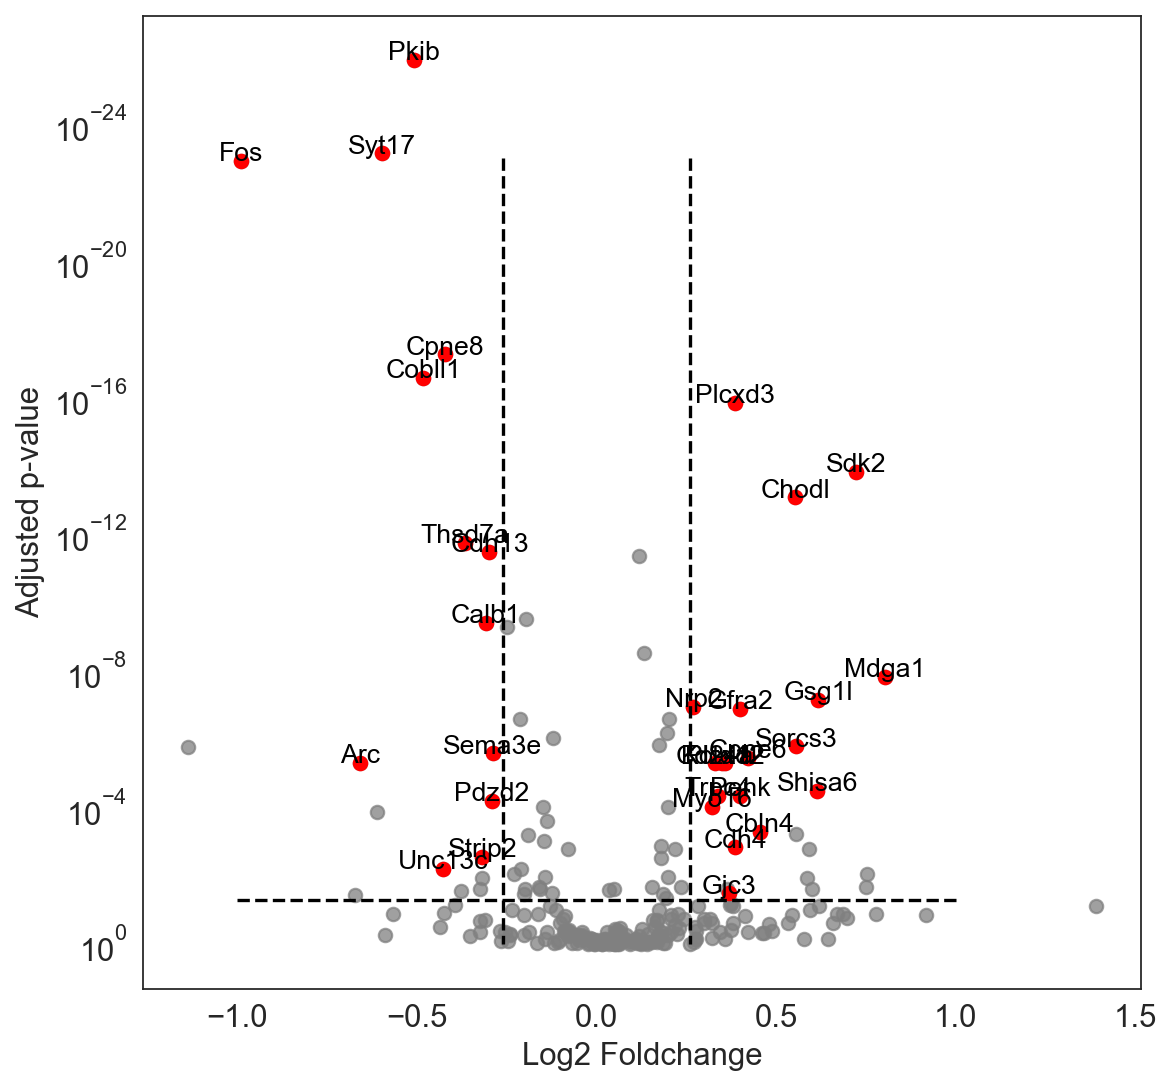

In [147]:
# dat1_filter = dat1[(~dat1['logfoldchanges'].between(-0.26,0.26)) & (dat1['pvals_adj'] <= 0.05) ]
# dat1_filter = dat1_filter.reset_index
# create sub pandas with genes over threshold
# plot after initial scatter with alpha = 1
# add text for each postion


plt.vlines(x=(-0.26,0.26), ymin=10e-24, ymax=1, color = "black", linestyles='dashed')
plt.hlines(y=0.05, xmin=-1, xmax=1, color = "black", linestyles='dashed')
plt.scatter(x=dat1['logfoldchanges'], y = dat1['pvals_adj'], alpha= 0.75, color = "grey", edgecolors=None)
plt.scatter(x= dat1_filter['logfoldchanges'], y=dat1_filter['pvals_adj'], alpha=1, color = 'red')
for idx, gene in enumerate(dat1_filter['names']):
    plt.text(dat1_filter['logfoldchanges'][idx], dat1_filter['pvals_adj'][idx], str(gene), color = 'black', fontsize = 12, ha= 'center')
plt.yscale('log')
plt.gca().invert_yaxis()
plt.xlabel('Log2 Foldchange')
plt.ylabel('Adjusted p-value')
plt.savefig('Gallery/volcano_plot_SCN.svg')

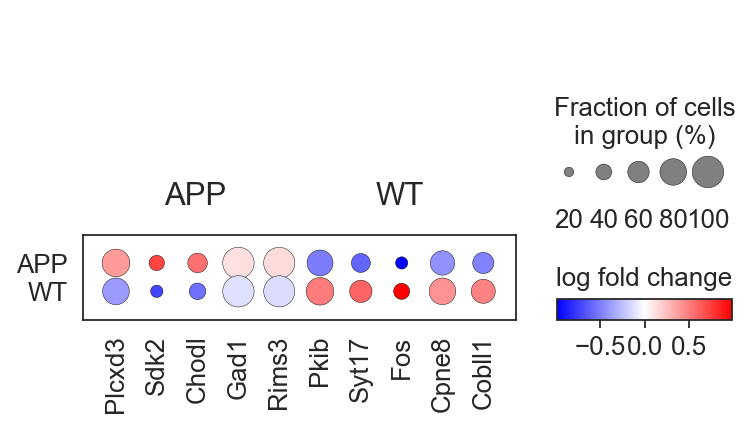

In [21]:
sc.pl.rank_genes_groups_dotplot(adata_microglia,
                                n_genes=5,
                                values_to_plot="logfoldchanges", cmap='bwr',
                                # vmin=-4,
                                # vmax=4,
                                )

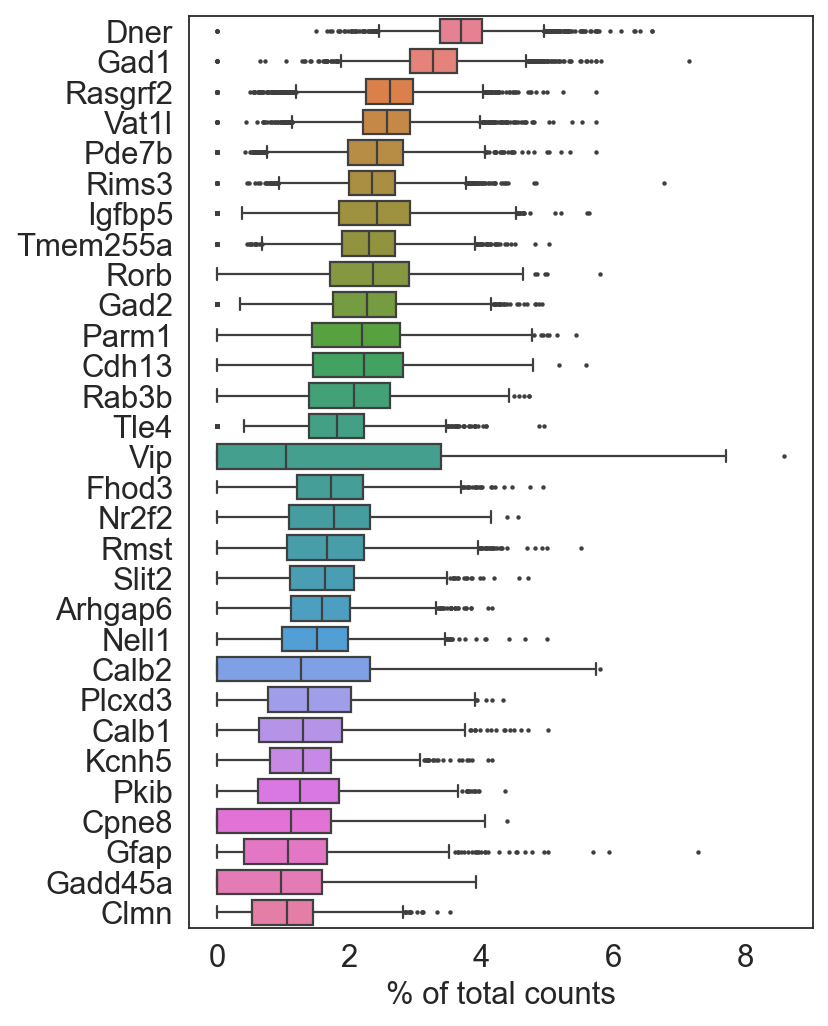

In [22]:
sc.pl.highest_expr_genes(adata_microglia, n_top=30, show=None, save=None, ax=None, gene_symbols=None, log=False)

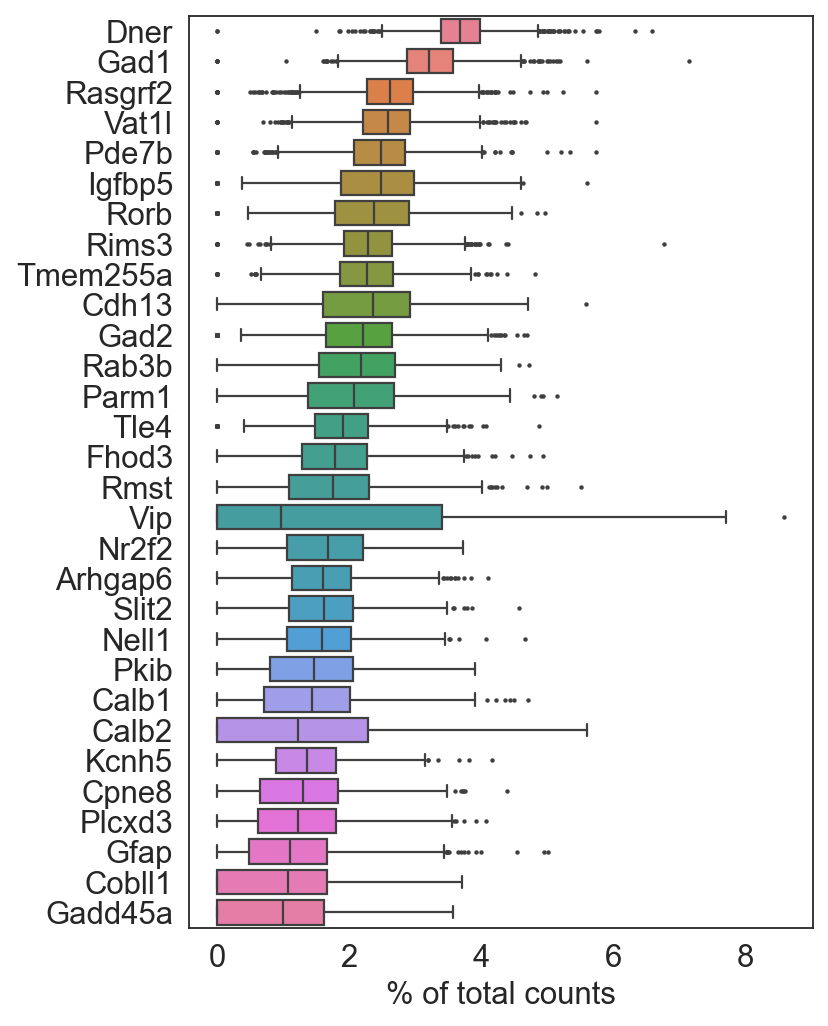

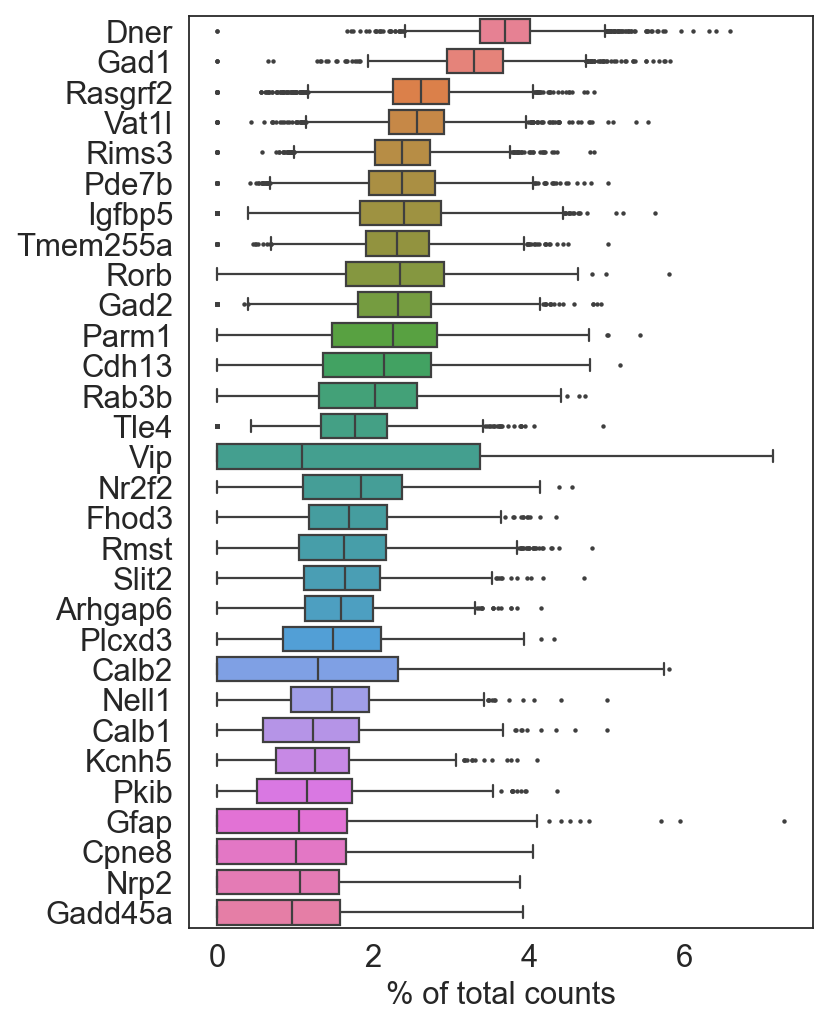

In [23]:
adata_microglia_WT=adata_microglia[adata_microglia.obs['Genotype']== 'WT']
adata_microglia_APP=adata_microglia[adata_microglia.obs['Genotype']== 'APP']

sc.pl.highest_expr_genes(adata_microglia_WT, n_top=30, show=None, save=None, ax=None, gene_symbols=None, log=False)
sc.pl.highest_expr_genes(adata_microglia_APP, n_top=30, show=None, save=None, ax=None, gene_symbols=None, log=False)

### Subcluster the subset

In [ ]:
# extract pca coordinates
X_pca = adata_microglia.obsm['X_pca'] 

sc.pp.pca(adata_microglia)
sc.pp.neighbors(adata_microglia)
sc.tl.umap(adata_microglia)

### Kmeans clustering
### You can choose the number of clusters by uncommenting n_clusters option
kmeans = KMeans(#n_clusters=2,
                random_state=0).fit(X_pca) 
adata_microglia.obs['kmeans'] = kmeans.labels_.astype(str)

sc.tl.leiden(adata_microglia, resolution = 0.2)

In [ ]:
### Choose one cluster to work with
#cluster_to_use = 'leiden0.4_classname'
# cluster_to_use = 'kmeans'
cluster_to_use = 'leiden'
# cluster_to_use = 'L04_newnum'

In [ ]:
### Number of cells per clusters
max_clust = len(adata_microglia.obs[cluster_to_use].unique())
for i in range(0, max_clust):
    count = adata_microglia.obs[cluster_to_use].value_counts().iloc[i]
    print(f"Cluster {i} : {count} cells")

In [ ]:
### Generate a color palette for the clusters - to make color stay consistent across samples
adata_microglia.obs[cluster_to_use] = adata_microglia.obs[cluster_to_use].astype(str)

# Create a palette with a unique color for each cluster
num_clusters = len(adata_microglia.obs[cluster_to_use].astype(int).unique())
palette = sns.color_palette("hls", n_colors=num_clusters)

# Map each 'leiden' value to a color
adata_microglia.obs['leiden_colors'] = adata_microglia.obs[cluster_to_use].astype(int).apply(lambda x: palette[x])

In [ ]:
### Let's make UMAP plot. We will also add the cluster centroids to the plot
adata_microglia.obs['umap-1'] = adata_microglia.obsm['X_umap'][:, 0]
adata_microglia.obs['umap-2'] = adata_microglia.obsm['X_umap'][:, 1]
cluster_centroids = adata_microglia.obs.groupby(cluster_to_use)[['umap-1', 'umap-2']].median()

In [ ]:
from dataviz_analysis import umap_plot_indi_multi
samples_ids = samples_ids
umap_plot_indi_multi(adata_microglia,
                     cluster_to_use = "leiden",
                     individual_plot = True,
                     save_plot = False,
                     cmap_ = 'hls',
                     )

In [ ]:
samples_ids_sub

In [ ]:
# Map all cells
fig, axs = plt.subplots(3,4,figsize=(30, 15))
axs = axs.flatten()
clusters_plot = {0: 'magenta',1: 'cyan',2: 'green', "":'red', "":'orange',"7":'black',"":"purple"
                }

for idx, sample in enumerate(samples_ids_sub):
    adata_sel = adata_microglia[(adata_microglia.obs['sample'] == sample)]
    for cluster_id in adata_sel.obs[cluster_to_use].unique():
        cluster_data = adata_sel.obs[adata_sel.obs[cluster_to_use] == cluster_id]
        colors = clusters_plot[cluster_id] if cluster_id in clusters_plot else "none" ### for selected clusters in cluster_plot
        colors= cluster_data['leiden_colors'].unique()[0] ### for all clusters
        axs[idx].scatter(cluster_data['x_centroid'].astype('float'), cluster_data['y_centroid'].astype('float'), color=colors, s=10, label=cluster_id)
        axs[idx].set_title(f"Sample {sample}")
        # axs[idx].set_ylim(400,1300)
        # axs[idx].set_xlim(4100,5600)



In [ ]:
from dataviz_analysis import cluster_plot

cluster_plot(adata_microglia,
             cluster_to_use = 'cell_type_final',
             cluster_to_map = 'all',
             cmap_ = 'hls',
             save_plot = False,
            )

In [ ]:
### Correlation map of subclusters
cont_tab = pd.crosstab(adata_microglia.obs[cluster_to_use], adata_microglia.obs['mmc:supertype_name'], normalize="index")
plt.figure(figsize=(120, 10))
sns.heatmap(cont_tab, annot=True, cmap="YlGnBu", fmt=".1f")

In [ ]:
# Obtain cluster-specific differentially expressed genes
cluster_to_use = 'leiden'
# cluster_to_use = 'Genotype'
adata_microglia.obs[cluster_to_use] = adata_microglia.obs[cluster_to_use].astype(str)
# sc.tl.dendrogram(adata_microglia, groupby = cluster_to_use, n_pcs=None, use_rep=None, var_names=None, use_raw=None, cor_method='pearson', linkage_method='complete', optimal_ordering=False, key_added=None)
sc.tl.rank_genes_groups(adata_microglia, groupby=cluster_to_use, method="wilcoxon")
sc.pl.rank_genes_groups_dotplot(adata_microglia, groupby=cluster_to_use, standard_scale="var", n_genes=5)

sc.pl.rank_genes_groups_dotplot(
    adata_microglia,
    n_genes=5,
    values_to_plot="logfoldchanges", cmap='bwr',
    vmin=-4,
    vmax=4,
)

In [ ]:
sc.pl.rank_genes_groups_violin(adata_microglia, groups=adata_microglia.obs[cluster_to_use], n_genes=1)

In [ ]:
ax = sc.pl.stacked_violin(adata_microglia, var_names = marker_genes , groupby='kmeans', dendrogram=True)

In [ ]:
# Obtain cluster-specific differentially expressed genes
# cluster_to_use = 'kmeans'
cluster_to_use = 'Genotype'
adata_microglia.obs[cluster_to_use] = adata_microglia.obs[cluster_to_use].astype(str)
# sc.tl.dendrogram(adata_microglia, groupby = cluster_to_use, n_pcs=None, use_rep=None, var_names=None, use_raw=None, cor_method='pearson', linkage_method='complete', optimal_ordering=False, key_added=None)
sc.tl.rank_genes_groups(adata_microglia, groupby=cluster_to_use, method="wilcoxon", tie_correct = True)
sc.pl.rank_genes_groups_dotplot(adata_microglia, groupby=cluster_to_use, standard_scale="var", n_genes=5)

sc.pl.rank_genes_groups_dotplot(
    adata_microglia,
    n_genes=5,
    values_to_plot="logfoldchanges", cmap='bwr',
    # vmin=-4,
    # vmax=4,
)

In [ ]:
### Extract gene expression per cluster + log fold change + p-value
cluster_to_use = 'Genotype'

adata_microglia.obs[cluster_to_use] = adata_microglia.obs[cluster_to_use].astype(str)
#sc.tl.dendrogram(adata, groupby = 'L04_newnum_subclassname')
sc.tl.rank_genes_groups(adata_microglia, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)

sc.pl.rank_genes_groups_dotplot(adata_microglia, groupby=cluster_to_use, standard_scale="var", n_genes=5)

dat = pd.DataFrame()
for i in adata2.obs[cluster_to_use].unique():
    print(f"Cluster {i}")
    dat1 = sc.get.rank_genes_groups_df(adata_microglia, group=i)
    dat1['group'] = i
    dat = pd.concat([dat, dat1])

### Extract not-normalized expression and clusters for individual cells
if not os.path.exists(f"{dir_notebook}/csv/{name_dir}/"):
   os.makedirs(f"{dir_notebook}/csv/{name_dir}/")
dat.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_clusters_foldchange_{celltype_to_subset}.csv")

In [ ]:
dfs = []

a_ = 0
strerhyt = '-'
strenbis = ' '

all_celltype = adata_microglia.obs['leiden'].unique()

for cell_type_to_extract in all_celltype:
    adata_microglia_temp = adata_microglia[adata_microglia.obs['leiden'] == cell_type_to_extract]
    
    ### Extract gene expression per cluster + log fold change + p-value
    cluster_to_use = 'Genotype'
    clust_uniq = adata_microglia_temp.obs[cluster_to_use].unique()
    dat = pd.DataFrame()

    if (len(adata_microglia_temp[adata_microglia_temp.obs[cluster_to_use] == clust_uniq[0]]) < 2) or (len(adata_microglia_temp[adata_microglia_temp.obs[cluster_to_use] == clust_uniq[1]]) < 2):
        dat['nothing'] = ['to see here']
        dfs.append(dat)
        a_ +=1
        print(f'[{a_ * strerhyt}{(len(all_celltype) - a_)*strenbis}] Cluster {a_} / {len(all_celltype)}')
        continue

    adata_microglia_temp.obs[cluster_to_use] = adata_microglia_temp.obs[cluster_to_use].astype(str)
    #sc.tl.dendrogram(adata, groupby = 'L04_newnum_subclassname')
    sc.tl.rank_genes_groups(adata_microglia_temp, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)
    
    # sc.pl.rank_genes_groups_dotplot(adata_microglia, groupby=cluster_to_use, standard_scale="var", n_genes=5)
    
    for i in adata_microglia_temp.obs[cluster_to_use].unique():
        # print(f"Cluster {cell_type_to_extract}_{i}")
        dat1 = sc.get.rank_genes_groups_df(adata_microglia_temp, group=i)
        dat1['group'] = i
        dat = pd.concat([dat, dat1])

    dat = dat[ ### Choose filters here
    (dat['pct_nz_group'] > 0.15) & #Percentage of cell expressing the gene
    (dat['pvals_adj']<= 0.05) & # adjusted p-value
    (abs(dat['logfoldchanges']) > 0.26) # logfoldchange
    ]
    a_ +=1
    print(f'[{a_ * strerhyt}{(len(all_celltype) - a_)*strenbis}] Cluster {a_} / {len(all_celltype)}')

    dfs.append(dat)
else:
    print('Extraction done')


import xlsxwriter
writer = pd.ExcelWriter(f'csv/{name_dir}/{celltype_to_subset}_subclusters_df_comb.xlsx', engine='xlsxwriter')
for j in range(0,len(dfs)):
    dfs[j].to_excel(writer, sheet_name=all_celltype[j], index=False)

writer.close()

In [ ]:
celltype_to_subset = "SCH"
adata_region_cell = adata2[adata2.obs['cell type'] == celltype_to_subset]

## Subset one region

In [ ]:
adata2.obs['region_automap'].unique()

In [ ]:
region_to_subset = "SCH"
adata_region = adata2[adata2.obs['region_automap'] == region_to_subset]

In [ ]:
adata_region.obs[adata_region.obs['cell type']== 'HY GABA'].groupby('mmc:subclass_name')['cell_id'].nunique()

In [ ]:
adata_region.obs[adata_region.obs['cell type']=='Astro']['cell_type_newnum'].head()

In [ ]:
# Generate new numbering base on unique 'cell type'
all_cell_type = adata_region.obs['cell type'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata_region.obs['cell_type_newnum'] = adata_region.obs['cell type'].map(mapping_dict)
# mapping_dict

### Generate a color palette for the clusters - to make color stay consistent across samples
adata_region.obs['cell_type_newnum'] = adata_region.obs['cell_type_newnum'].astype(int)

# Create a palette with a unique color for each cluster
num_clusters = len(adata_region.obs['cell_type_newnum'].unique())
palette = sns.color_palette("bright", n_colors=num_clusters)

# Map each 'leiden' value to a color
adata_region.obs['kmeans_colors'] = adata_region.obs['cell_type_newnum'].apply(lambda x: palette[x])

# Mapping of clusters
fig, axs = plt.subplots(3,2,figsize=(15, 18))
axs = axs.flatten()
clusters_plot = { 1: 'lightcoral', 11:'black',4:'red',
    # 0: 'orchid', 1: 'forestgreen',2: 'coral', 4:'orange',
    # 3:'red', 5:'blue',6:'cyan',7:'black'
    # 4:'red',0:'black'
}

for idx, sample in enumerate(samples_ids):
    adata_sel = adata_region[(adata_region.obs['sample'] == sample)]
    for cluster_id in adata_sel.obs['cell_type_newnum'].unique():
        cluster_data = adata_sel.obs[adata_sel.obs['cell_type_newnum'] == cluster_id]
        if len(cluster_data) >= 0:
            colors = clusters_plot[cluster_id] if cluster_id in clusters_plot else "none"
            colors= cluster_data['kmeans_colors'].unique()[0]
            axs[idx].scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=15, label=cluster_data['cell type'].unique()[0])
            axs[idx].set_title(f"Sample {sample}")

plt.legend(markerscale=1, scatterpoints=1000, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


In [ ]:
# len(adata_region)/1000
# adata_region_notunique.obs.groupby('cell type')['cell_id'].nunique()
# list_to_exclude

In [ ]:
list_to_exclude  = adata_region.obs.groupby('cell type')['cell_id'].nunique() >= 10
list_to_exclude.values
dict_exclude = dict(zip(list_to_exclude.index, list_to_exclude.values))
dict_exclude

adata_region.obs['exclude'] = adata_region.obs['cell type'].map(dict_exclude)

adata_region_notunique = adata_region[adata_region.obs['exclude'] != False]

adata_region_notunique.obs.groupby('cell type')['cell_id'].nunique()

sc.tl.dendrogram(adata_region_notunique, groupby = 'cell type', n_pcs=None, use_rep=None, var_names=None, use_raw=None, cor_method='pearson', linkage_method='complete', optimal_ordering=False, key_added=None)
sc.tl.rank_genes_groups(adata_region_notunique, groupby='cell type', method="wilcoxon", tie_correct = True)
sc.pl.rank_genes_groups_dotplot(adata_region_notunique, groupby='cell type', standard_scale="var", n_genes=5)

In [ ]:
sc.pl.rank_genes_groups_dotplot(
    adata_region_notunique,
    n_genes=5,
    values_to_plot="logfoldchanges", cmap='bwr',
    # vmin=-4,
    # vmax=4,
)

In [ ]:
### Extract gene expression per cluster + log fold change + p-value
cluster_to_use = 'Genotype'

adata_region.obs[cluster_to_use] = adata_region.obs[cluster_to_use].astype(str)
#sc.tl.dendrogram(adata, groupby = 'L04_newnum_subclassname')
sc.tl.rank_genes_groups(adata_region, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)

sc.pl.rank_genes_groups_dotplot(adata_region, groupby=cluster_to_use, standard_scale="var", n_genes=5)

dat = pd.DataFrame()
for i in adata_region.obs[cluster_to_use].unique():
    print(f"Cluster {i}")
    dat1 = sc.get.rank_genes_groups_df(adata_region, group=i)
    dat1['group'] = i
    dat = pd.concat([dat, dat1])

### Extract not-normalized expression and clusters for individual cells
if not os.path.exists(f"{dir_notebook}/csv/{name_dir}/"):
   os.makedirs(f"{dir_notebook}/csv/{name_dir}/")
dat.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_clusters_foldchange_{region_to_subset}-region.csv")

In [ ]:
celltype_to_subset = "Astro"
adata_region_cell = adata_region[adata_region.obs['cell type'] == celltype_to_subset]

In [ ]:
### Extract gene expression per cluster + log fold change + p-value
cluster_to_use = 'Genotype'

adata_region_cell.obs[cluster_to_use] = adata_region_cell.obs[cluster_to_use].astype(str)
#sc.tl.dendrogram(adata, groupby = 'L04_newnum_subclassname')
sc.tl.rank_genes_groups(adata_region_cell, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)

sc.pl.rank_genes_groups_dotplot(adata_region_cell, groupby=cluster_to_use, standard_scale="var", n_genes=5)

dat = pd.DataFrame()
for i in adata_region_cell.obs[cluster_to_use].unique():
    print(f"Cluster {i}")
    dat1 = sc.get.rank_genes_groups_df(adata_region_cell, group=i)
    dat1['group'] = i
    dat = pd.concat([dat, dat1])

### Extract not-normalized expression and clusters for individual cells
if not os.path.exists(f"{dir_notebook}/csv/{name_dir}/"):
   os.makedirs(f"{dir_notebook}/csv/{name_dir}/")
dat.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_clusters_foldchange_{region_to_subset}-region-{celltype_to_subset}-cell.csv")

# Output files

## Extract foldchange, pvalue for celltypes

In [ ]:
adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz")

In [ ]:
adata2 = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_norm.h5ad.gz")

In [ ]:
adata2.obs['cell_type_newnum_final'] = adata.obs['cell_type_newnum_final']
adata2.obs['cell_type_final'] = adata.obs['cell_type_final']
adata2.obs['region_automap_name'] = adata.obs['region_automap_name']
# adata2.obs['region_automap_num'] = adata.obs['region_automap_num']
# adata2.obs['region_manual'] = adata.obs['region_manual_name']

adata2.obsm['reduced_pc_20_umap'] = adata.obsm['reduced_pc_20_umap']

all_celltype = np.array(adata2.obs['cell_type_final'].unique())

In [ ]:
adata2.write(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_final.h5ad.gz", compression='gzip')

In [ ]:
# HC only
adata2.obs['Genotype'] = 0
adata2.obs['ZT'] = 0

geno_dict = {'3159-1':'WT','2670-1':'WT','3159-2':'WT','3159-3':'WT','3159-4':'WT','2505-1':'APP','2505-2':'APP','3160-1':'APP',
             '3160-2':'APP','3161-1':'APP','3161-2':'APP','3161-3':'APP',
}
ZT_dict = {
    '3159-1':'ZT17','2670-1':'ZT5','3159-2':'ZT17','3159-3':'ZT17','3159-4':'ZT17','2505-1':'ZT5','2505-2':'ZT5',
'3160-1':'ZT17','3160-2':'ZT17','3161-1':'ZT17','3161-2':'ZT17','3161-3':'ZT17',
}

adata2.obs['Genotype'] = adata2.obs['sample'].map(geno_dict)
adata2.obs['ZT'] = adata2.obs['sample'].map(ZT_dict)

In [ ]:
all_celltype = np.array(adata2.obs['cell_type_final'].unique())

In [ ]:
sc.pp.normalize_total(adata2, inplace=True)
sc.pp.log1p(adata2)

In [ ]:
gene_names = np.array(adata2.var_names)
gene_names = sorted(gene_names)
print(gene_names)

In [ ]:
dat

In [ ]:
sc.tl.rank_genes_groups(adata2, groupby='Genotype', method="wilcoxon", tie_correct = True, pts = True)

for i in adata2.obs[cluster_to_use].unique():
    # print(f"Cluster {cell_type_to_extract}_{i}")
    dat = sc.get.rank_genes_groups_df(adata_microglia, group="APP")


# # ### Extract normalized expression and clusters for individual cells
# # if not os.path.exists(f"{dir_notebook}/csv/{name_dir}/foldchange"):
# #    os.makedirs(f"{dir_notebook}/csv/{name_dir}/foldchange")
# dat.to_csv(f"csv/{name_dir}/foldchange/{name_dir}_foldchange_wholesection.csv")

In [ ]:
import progressbar


dfs = []
filters_ = True
filters_dic = {'percentage_pop': 0.15,
               'pval_adj' : 0.05,
               'logfoldchanges' : 0.26}

a_ = 0
bar = progressbar.ProgressBar(maxval=len(all_celltype), \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()

for cell_type_to_extract in all_celltype:
    adata_microglia = adata2[adata2.obs['cell_type_final'] == cell_type_to_extract]
    
    ### Extract gene expression per cluster + log fold change + p-value
    cluster_to_use = 'Genotype'
    clust_uniq = adata2.obs[cluster_to_use].unique()
    dat = pd.DataFrame()

    if (len(adata_microglia[adata_microglia.obs[cluster_to_use] == clust_uniq[0]]) < 2) or (len(adata_microglia[adata_microglia.obs[cluster_to_use] == clust_uniq[1]]) < 2):
        dat['nothing'] = ['to see here']
        dfs.append(dat)
        # a_ +=1
        continue

    adata_microglia.obs[cluster_to_use] = adata_microglia.obs[cluster_to_use].astype(str)
    #sc.tl.dendrogram(adata, groupby = 'L04_newnum_subclassname')
    sc.tl.rank_genes_groups(adata_microglia, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)
    
    # sc.pl.rank_genes_groups_dotplot(adata_microglia, groupby=cluster_to_use, standard_scale="var", n_genes=5)
    
    for i in adata2.obs[cluster_to_use].unique():
        # print(f"Cluster {cell_type_to_extract}_{i}")
        dat1 = sc.get.rank_genes_groups_df(adata_microglia, group=i)
        dat1['group'] = i
        dat = pd.concat([dat, dat1])

    if filters_ == True:
        dat = dat[ ### Choose filters here
        (dat['pct_nz_group'] > filters_dic['percentage_pop']) & #Percentage of cell expressing the gene
        (dat['pvals_adj']<= filters_dic['pval_adj']) & # adjusted p-value
        (abs(dat['logfoldchanges']) > filters_dic['logfoldchanges']) # logfoldchange
        ]

    a_ +=1
    bar.update(a_+1)

    dfs.append(dat)
else:
    print('Extraction done')

bar.finish()
import xlsxwriter
writer = pd.ExcelWriter(f'csv/{name_dir}/all_celltypes_df_comb_nothres.xlsx', engine='xlsxwriter')
for j in range(0,len(dfs)):
    dfs[j].to_excel(writer, sheet_name=all_celltype[j], index=False)

writer.close()

In [ ]:
all_regions = np.array(['VMH', 'VLMC', 'HY', 'ARH', 'Ependymal', 'TH', 'MB', 'AMY',
       'STR', 'CTX', 'MH', 'LH', 'HIPP', 'NLOT', 'LSX', 'SCH', 'MM', 'SC'])

In [ ]:
dfs = []
# all_regions = np.array(adata2.obs['region_automap'].unique())
# all_regions = all_regions[np.logical_not(np.isnan(all_regions))]

filters_ = True
filters_dic = {'percentage_pop': 0.15,
               'pval_adj' : 0.05,
               'logfoldchanges' : 0.26}

a_ = 0
bar = progressbar.ProgressBar(maxval=len(all_regions), \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()


for region_to_extract in all_regions:
    adata_microglia = adata2[adata2.obs['region_automap_name'] == region_to_extract]
    
    ### Extract gene expression per cluster + log fold change + p-value
    cluster_to_use = 'Genotype'
    clust_uniq = adata2.obs[cluster_to_use].unique()
    dat = pd.DataFrame()

    if (len(adata_microglia[adata_microglia.obs[cluster_to_use] == clust_uniq[0]]) < 2) or (len(adata_microglia[adata_microglia.obs[cluster_to_use] == clust_uniq[1]]) < 2):
        dat['nothing'] = ['to see here']
        dfs.append(dat)
        # a_ +=1
        continue

    adata_microglia.obs[cluster_to_use] = adata_microglia.obs[cluster_to_use].astype(str)
    sc.tl.rank_genes_groups(adata_microglia, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)
    
   
    for i in adata2.obs[cluster_to_use].unique():
        # print(f"Cluster {cell_type_to_extract}_{i}")
        dat1 = sc.get.rank_genes_groups_df(adata_microglia, group=i)
        dat1['group'] = i
        dat = pd.concat([dat, dat1])

    if filters_ == True:
        dat = dat[ ### Choose filters here
        (dat['pct_nz_group'] > filters_dic['percentage_pop']) & #Percentage of cell expressing the gene
        (dat['pvals_adj']<= filters_dic['pval_adj']) & # adjusted p-value
        (abs(dat['logfoldchanges']) > filters_dic['logfoldchanges']) # logfoldchange
        ]

    a_ +=1
    bar.update(a_+1)

    dfs.append(dat)
else:
    print('Extraction done')


import xlsxwriter
writer = pd.ExcelWriter(f'csv/{name_dir}/all_regions_df_comb.xlsx', engine='xlsxwriter')
for j in range(0,len(dfs)):
    dfs[j].to_excel(writer, sheet_name=all_regions[j], index=False)

writer.close()

In [ ]:
all_regions

In [ ]:
all_regions = np.array(adata2.obs['region_automap'].unique())

In [ ]:
all_celltype = np.delete(all_celltype, np.where(all_celltype == 'AD Glut'))
all_celltype

In [ ]:
import xlsxwriter

for region_to_extract in all_regions:
    
    cluster_to_use = 'Genotype'
    clust_uniq = adata2.obs[cluster_to_use].unique()
    
    adata3 = adata2[adata2.obs['region_automap'] == region_to_extract]

    
    if (len(adata3[adata3.obs[cluster_to_use] == clust_uniq[0]]) < 2) or (len(adata3[adata3.obs[cluster_to_use] == clust_uniq[1]]) < 2):
        continue

    dfs = []
    a_ = 0
    strerhyt = '-'
    strenbis = ' '
    all_celltype = np.array(adata3.obs['cell_type_final'].unique())
    print(f'Starting region : {region_to_extract}')
    for cell_type_to_extract in all_celltype:
        adata_microglia = adata3[adata3.obs['cell_type_final'] == cell_type_to_extract]
        
        ### Extract gene expression per cluster + log fold change + p-value
        
        
        dat = pd.DataFrame()

        if (len(adata_microglia[adata_microglia.obs[cluster_to_use] == clust_uniq[0]]) < 2) or (len(adata_microglia[adata_microglia.obs[cluster_to_use] == clust_uniq[1]]) < 2):
            dat['nothing'] = ['to see here']
            dfs.append(dat)
            a_ +=1
            print(f'[{a_ * strerhyt}{(len(all_celltype) - a_)*strenbis}] Cluster {a_} / {len(all_celltype)}')
            continue

        adata_microglia.obs[cluster_to_use] = adata_microglia.obs[cluster_to_use].astype(str)
        sc.tl.rank_genes_groups(adata_microglia, groupby=cluster_to_use, method="wilcoxon", tie_correct = True, pts = True)
        
        for i in adata3.obs[cluster_to_use].unique():
            # print(f"Cluster {cell_type_to_extract}_{i}")
            dat1 = sc.get.rank_genes_groups_df(adata_microglia, group=i)
            dat1['group'] = i
            dat = pd.concat([dat, dat1])

        dat = dat[ ### Choose filters here
        (dat['pct_nz_group'] > 0.15) & #Percentage of cell expressing the gene
        (dat['pvals_adj']<= 0.05) & # adjusted p-value
        (abs(dat['logfoldchanges']) > 0.26) # logfoldchange
        ]
        a_ +=1
        print(f'[{a_ * strerhyt}{(len(all_celltype) - a_)*strenbis}] Cluster {a_} / {len(all_celltype)}')

        dfs.append(dat)
    else:
        print('Extraction done')


    
    writer = pd.ExcelWriter(f'csv/{name_dir}/foldchange/regions/{region_to_extract}_all_celltypes_df_comb.xlsx', engine='xlsxwriter')
    for j in range(0,len(dfs)):
        dfs[j].to_excel(writer, sheet_name=all_celltype[j], index=False)

    writer.close()

In [ ]:
adata_microglia

## Normalized gene counts with cell type and automap regions

In [ ]:
# adata = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_Banksy_annotated_automap.h5ad.gz")
adata_norm = sc.read_h5ad(f"{dir_notebook}/h5ad/{name_dir}/{name_dir}_MMC_norm.h5ad.gz")


In [ ]:
len(adata_norm), len(adata)

In [ ]:
adata.obs.head()

In [ ]:
# adata_norm = adata2
df = pd.DataFrame(data=adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)
df['cell_id'] = df.index

In [ ]:
# # # Create a dictionary to map old values to new values
mapping_dict_region = dict(zip(adata.obs['cell_id'], adata.obs['region_automap_name']))
mapping_dict_celltype = dict(zip(adata.obs['cell_id'], adata.obs['cell_type_final']))
# mapping_dict_cellclass = dict(zip(adata.obs['cell_id'], adata.obs['cell_class']))
mapping_dict_manos = dict(zip(adata.obs['cell_id'], adata.obs['sample']))
mapping_dict_circascore = dict(zip(adata.obs['cell_id'], adata.obs['circascore']))
mapping_dict_run = dict(zip(adata.obs['cell_id'], adata.obs['run']))
mapping_dict_ZT = dict(zip(adata.obs['cell_id'], adata.obs['ZT']))

# # # Use .map() function to rename cell contents in 'col1' based on mapping dictionary
df['region_automap'] = df['cell_id'].map(mapping_dict_region)
df['cell_type_final'] = df['cell_id'].map(mapping_dict_celltype)
# df['cell_class'] = df['cell_id'].map(mapping_dict_cellclass)
df['sample'] = df['cell_id'].map(mapping_dict_manos)
df['circascore'] = df['cell_id'].map(mapping_dict_circascore)

df['run'] = df['cell_id'].map(mapping_dict_run)
df['ZT'] = df['cell_id'].map(mapping_dict_ZT)



df.dropna(subset=['cell_type_final'], inplace=True)

In [ ]:
df.shape

In [ ]:
# df.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_norm_combined.csv.gz",
#             compression={'method': 'gzip'}
#          )

df.to_parquet(f"{dir_notebook}/csv/{name_dir}/{name_dir}_norm_combined.parquet")

In [ ]:
df.shape

In [ ]:
celltype_ = adata.obs['cell_type_final'].unique()
# celltype_ = adata.obs['cell_type_final'].unique()[0:1]
gene_dfs = []
# df2 = df
marker_genes = adata_norm.var.index
genes_df = pd.DataFrame()
sample_list = pd.DataFrame(adata.obs['sample'].unique())

for celltype in celltype_:
    df2 = df[df['cell_type_final'] == celltype]
    genes_df = pd.DataFrame()
    for gene_ in marker_genes:
        temp = df2.groupby('sample')[gene_].mean()
        temp_df = pd.DataFrame(temp)
        genes_df = pd.concat([genes_df, temp_df], axis = 1)
    gene_dfs.append(genes_df)


import xlsxwriter
writer = pd.ExcelWriter(f'csv/{name_dir}/{name_dir}_gene_dfs.xlsx', engine='xlsxwriter')
for j in range(0,len(gene_dfs)):
    gene_dfs[j].to_excel(writer, sheet_name=celltype_[j], index=False)

writer.close()

## Extract score, FC, p-value for each genes, compared to other clusters

In [ ]:
### Extract gene expression per cluster + log fold change + p-value

cluster_to_use = 'sample'
# cluster_to_use = 'Genotype'

adata2.obs[cluster_to_use] = adata2.obs[cluster_to_use].astype(str)
#sc.tl.dendrogram(adata, groupby = 'L04_newnum_subclassname')
sc.tl.rank_genes_groups(adata2, groupby=cluster_to_use, method="wilcoxon", tie_correct = True)

# sc.pl.rank_genes_groups_dotplot(adata2, groupby=cluster_to_use, standard_scale="var", n_genes=5)
a_ = 0
bar = progressbar.ProgressBar(maxval=len(all_celltype), \
    widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
bar.start()

dat = pd.DataFrame()
for i in adata2.obs[cluster_to_use].unique():
    print(f"Cluster {i}")
    dat1 = sc.get.rank_genes_groups_df(adata2, group=str(i))
    dat1['group'] = i
    dat = pd.concat([dat, dat1])
    a_ +=1
    bar.update(a_+1)

bar.finish()

### Extract not-normalized expression and clusters for individual cells
if not os.path.exists(f"{dir_notebook}/csv/{name_dir}/"):
   os.makedirs(f"{dir_notebook}/csv/{name_dir}/")
dat.to_csv(f"{dir_notebook}/csv/{name_dir}/{name_dir}_clusters_foldchange_allbrain.csv")

In [ ]:
dict_type = dict(zip(adata.obs['cell_type_final'],adata.obs['cell_type_final']))

In [ ]:
dict_type = {'Tanycyte': 'Epithelial',
 'HY GABA': 'Neuronal',
 'ARH Glut': 'Neuronal',
 'VMH Glut': 'Neuronal',
 'Ependymal': 'Epithelial',
 'Oligodendrocyte': 'Glial',
 'AMY Glut': 'Neuronal',
 'TH Glut': 'Neuronal',
 'HY Glut': 'Neuronal',
 'Endothelial': 'Epithelial',
 'Microglia': 'Glial',
 'Astro NT': 'Glial',
 'OPC': 'Glial',
 'Pericyte': 'Epithelial',
 'L2 3 IT PIR ENTl Glut': 'Neuronal',
 'AMY Gaba': 'Neuronal',
 'Sst Gaba': 'Neuronal',
 'CLA EPd Glut': 'Neuronal',
 'Pvalb Gaba': 'Neuronal',
 'VLMC': 'Epithelial',
 'STR Gaba': 'Neuronal',
 'PAL STR Gaba': 'Neuronal',
 'L6 IT CTX Glut': 'Neuronal',
 'Astro TE': 'Glial',
 'L2345 IT CTX Glut': 'Neuronal',
 'CA3 Glut': 'Neuronal',
 'Vip Gaba': 'Neuronal',
 'CA2 FC IG Glut': 'Neuronal',
 'Lamp5 Gaba': 'Neuronal',
 'L6b CTX Glut': 'Neuronal',
 'L6 CT CTX Glut': 'Neuronal',
 'L5 CTX Glut': 'Neuronal',
 'CHOR': 'Epithelial',
 'LH Glut': 'Neuronal',
 'MH Glut': 'Neuronal',
 'DG Glut': 'Neuronal',
 'CA1 ProS Glut': 'Neuronal',
 'L2 3 IT RSP Glut': 'Neuronal',
 'L4 RSP ACA Glut': 'Neuronal',
 'MB GABA': 'Neuronal',
 'OB CR Glut': 'Neuronal',
 
'Astro NT': 'Glial',
'Oligodendrocyte': 'Glial',
'Astro TE' : 'Glial',
'Pericyte' :'Epithelial',
'Ependymal' : 'Epithelial',           
'Pineal Glut': 'Neuronal',
'Endothelial'   : 'Epithelial',
'Microglia' : 'Glial',
'Tanycyte': 'Epithelial',      
'OPC' : 'Glial',
'BST Glut' : 'Neuronal',         
'VLMC': 'Epithelial',      
'SC Gaba': 'Neuronal',
'MM Glut': 'Neuronal',
'SCH Gaba': 'Neuronal',
'LSX Gaba': 'Neuronal',
'MH Glut': 'Neuronal',
'L23 RSP Glut': 'Neuronal',
'CHOR' : 'Epithelial',
'AV Glut'  : 'Neuronal',            
'LH Glut': 'Neuronal',
'MB Glut' : 'Neuronal',
'ARH GABA'  : 'Neuronal', 
'STR D1D2 Gaba' : 'Neuronal', 
'DG Glut'   : 'Neuronal',
'PAG Glut'  : 'Neuronal',
'HY GABA'  : 'Neuronal', 
'Vip Gaba' : 'Neuronal',
'APN Glut' : 'Neuronal', 
'LGv Gaba' : 'Neuronal',   
'STRv PAL Gaba' : 'Neuronal',
'SC Glut' : 'Neuronal',  
'MEA Gaba'  : 'Neuronal',  
'PRT Gaba' : 'Neuronal',  
'BST Gaba' : 'Neuronal',
'LHA Glut'  : 'Neuronal',
'L6 CTX Glut' : 'Neuronal',
'L4 CTX Glut' : 'Neuronal',
'RT ZI GABA' : 'Neuronal',
'Lamp5 Gaba' : 'Neuronal',          
'PF Glut'   : 'Neuronal',           
'Sst Gaba'  : 'Neuronal',           
'L23 CTX Glut' : 'Neuronal',        
'PVT Glut'  : 'Neuronal',           
'HY Glut'  : 'Neuronal',
'L6b CTX Glut'  : 'Neuronal',       
'MEA Glut'   : 'Neuronal',     
'VMH Glut'  : 'Neuronal',           
'ZI Gaba'   : 'Neuronal',           
'STR Gaba'  : 'Neuronal',           
'Pvalb Gaba' : 'Neuronal',         
'TH Glut'    : 'Neuronal',          
'SN Gaba'   : 'Neuronal',           
'LA Glut'   : 'Neuronal',           
'L5 CTX Glut'   : 'Neuronal',       
'AD Glut'      : 'Neuronal',        
'SN Dopa'         : 'Neuronal',     
'CA1 ProS Glut'   : 'Neuronal',     
'SUB ProS Glut': 'Neuronal',    
'L23 PIR ENTl Glut' : 'Neuronal',   
'NLOT Glut': 'Neuronal',     
'CA3 Glut': 'Neuronal',      
'CA2 FC IG Glut'  : 'Neuronal',
}
adata = adata[adata.obs['cell_type_final'] != 'Undefined']

In [ ]:
adata.obs['cell_class'] = adata.obs['cell_type_final'].map(dict_type)

In [ ]:
all_cell_type = adata.obs['cell_class'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata.obs['cell_class_newnum'] = adata.obs['cell_class'].map(mapping_dict)
mapping_dict

In [ ]:
adata.obs['region_automap_name2'][adata.obs['region_automap_name'].isna()] = 'WM'

In [ ]:
adata.obs['region_automap_name2'].unique()

In [ ]:
temp = adata.obs['region_automap_name'].cat.add_categories("WM").fillna("WM")
adata.obs['region_automap_name'] = temp
all_cell_type = adata.obs['region_automap_name'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata.obs['region_automap_num'] = adata.obs['region_automap_name'].map(mapping_dict)
mapping_dict

In [ ]:
mapping_dict = {
    'VMH': 'VMH',
 'VLMC': 'VLMC',
 'HY': 'HY',
 'ARH': 'ARH',
 'Ependymal': 'Ependymal',
 'TH': 'TH',
 'MB': 'MB',
 'AMY': 'AMY',
 'STR': 'STR',
 'CTX': 'CTX',
 'MH': 'MH',
 'LH': 'LH',
 'HIPP': 'HIPP',
 'NLOT': 'NLOT',
 'LSX': 'LSX',
 'SCH': 'SCH',
 'MM': 'MM',
 'SC': 'SC'
 }
adata.obs['region_automap_name2'] = adata.obs['region_automap_name'].apply(lambda x: mapping_dict[x] if x in mapping_dict else "WM")

In [ ]:
all_cell_type = adata.obs['cell_type_final'].unique()
list_cell_nb = range(0, len(all_cell_type))
mapping_dict = dict(zip(all_cell_type,list_cell_nb))
adata.obs['cell_type_newnum_final'] = adata.obs['cell_type_final'].map(mapping_dict)
mapping_dict

In [ ]:
dict_color = dict(zip(adata.obs['cell_class'], adata.obs['leiden_colors']))
df['leiden_colors'] = df['cell_class'].map(dict_color)

In [ ]:
sns.histplot(x=adata.obs['cell_area'])

In [ ]:
adata2.obs.sample(2)

In [ ]:
pd.set_option('display.max_rows', 250)
adata2.obs.groupby('cell_type_final')['transcript_counts'].mean().sort_values()

In [ ]:
adata3.obs.sample()

In [ ]:
adata2.obsm['X_pca'] = adata.obsm['reduced_pc_20']
adata2.obs['mmc:subclass_name'] = adata.obs['mmc:subclass_name']
adata2.obs['Gfap'] = adata.obs['Gfap']
adata3 = adata2[adata2.obs['cell_type_final'] == 'MH Glut']
adata3.obs['new_cluster2'] = 0

In [ ]:
all_samples = adata3.obs['sample'].unique()

for sample_ in all_samples:
    adata_subcluster = adata3[adata3.obs['sample'] == sample_]

    sc.pp.pca(adata_subcluster)
    sc.pp.neighbors(adata_subcluster)
    sc.tl.umap(adata_subcluster)

    adata.obsm['X_pca'] = adata.obsm['reduced_pc_20']
    X_pca = adata_subcluster.obsm['X_pca']
    kmeans = KMeans(n_clusters=3,
                    random_state=0).fit(X_pca) 
    adata_subcluster.obs['kmeans'] = kmeans.labels_.astype(str)
    adata_subcluster.obs['new_cluster'] = 'leiden'
    adata_subcluster.obs['new_cluster2'] = adata_subcluster.obs['sample'].astype("str") + '.' +adata_subcluster.obs['cell_type_final'].astype("str") + '.' + adata_subcluster.obs[clustering_method].astype("str")
    adata_subcluster.obs[['cell_id','new_cluster2']].sample(2)
    # Create a dictionary to map old values to new values
    mapping_dict = dict(zip(adata_subcluster.obs['cell_id'], adata_subcluster.obs['new_cluster2']))

    # Use .map() function to rename cell contents in 'col1' based on mapping dictionary
    adata3.obs['new_cluster2'] = adata3.obs.apply(lambda x: mapping_dict[x['cell_id']] if x['cell_id'] in mapping_dict else x['new_cluster2'],axis = 1)

In [ ]:
adata3.obs.groupby('new_cluster2')['Gfap'].median()

In [ ]:
adata3.obs.groupby('new_cluster2')['cell_id'].count()

In [ ]:
### Generate a color palette for the clusters - to make color stay consistent across samples
adata_subcluster.obs[clustering_method] = adata_subcluster.obs[clustering_method].astype(int)

# Create a palette with a unique color for each cluster
num_clusters = len(adata_subcluster.obs[clustering_method].unique())
palette = sns.color_palette("tab20", n_colors=num_clusters)

# Map each 'leiden' value to a color
adata_subcluster.obs['kmeans_colors'] = adata_subcluster.obs[clustering_method].apply(lambda x: palette[x])

# Mapping of clusters
fig, axs = plt.subplots(3,4,figsize=(20, 20))
axs = axs.flatten()
clusters_plot = {
    # 0: 'orchid',
    # 1: 'forestgreen',
    # 2: 'coral',
    # 3:'red', 
    4:'cyan', 5:'blue',
    # 6:'darkorange',
    7:'black',
    8:'forestgreen',
    9: 'coral', 10:'red', 
    11:'cyan',12:'blue',
    13:'darkorange',
    14:'black'
    # 4:'red',0:'black'
}

for idx, sample in enumerate(samples_ids):
    adata_sel = adata_subcluster[(adata_subcluster.obs['sample'] == sample)]
    for cluster_id in adata_sel.obs[clustering_method].unique():
        cluster_data = adata_sel.obs[adata_sel.obs[clustering_method] == cluster_id]
        colors = clusters_plot[cluster_id] if cluster_id in clusters_plot else "none"
        colors= cluster_data['kmeans_colors'].unique()[0]
        axs[idx].scatter(cluster_data['x_centroid'], cluster_data['y_centroid'], color=colors, s=2, label=cluster_id)
        axs[idx].set_title(f"Sample {sample}")

### Extract cell population comparison

In [ ]:
adata.obs.sample()

In [ ]:
adata_region = adata[adata.obs['region_automap_name'] == 'SCH']

In [ ]:
# adata_region.obs.groupby('Genotype', as_index=False)['cell_type_final'].value_counts(normalize=False)
df_t = adata_region.obs.groupby('sample', as_index=False)['Genotype','cell_type_final'].value_counts(normalize=False)
# adata_region.obs.value_counts(['Genotype','cell_type_final',], normalize=False)
df_t

In [ ]:
df_t.to_csv(f'csv/{name_dir}/{name_dir}_SCH_cellpop.csv')

In [ ]:
df = pd.read_parquet('csv/circa2/circa2_norm_nonlog_combined.parquet')

In [ ]:
df.head()

In [ ]:
df[df['cell_type_final']=='LH Glut']['Zic1'].mean()

In [ ]:
df2 = pd.read_parquet('csv/circa2/circa2_norm_combined.parquet')

In [ ]:
df2[df2['cell_type_final']=='LH Glut']['Zic1'].mean()

In [ ]:
temp = df[df['cell_type_final']=='LH Glut']['Zic1']

In [ ]:
df['cell_type_final'].nunique()

In [ ]:
df2.to_parquet(f"{dir_notebook}/csv/{name_dir}/{name_dir}_norm_combined_regions_circascore.parquet")

In [ ]:
df2['circascore']=0
clock_genes =['Arntl','Clock','Cry1','Cry2','Nr1d1',"Per1",'Per2','Per3','Rora','Rorb','Rorc',"Npas2"]


for n in range(0, len(df2)):
    print(f'{n} / {len(df2)}')
    count_ = 0
    for g in clock_genes:
        count_ +=1
        print(f'{count_} / {len(clock_genes)} ')
        if df2[g][n] > 0:
            df2['circascore'][n] += 1

df2.head()

In [ ]:
df2 = pd.read_parquet(f"{dir_notebook}/csv/{name_dir}/{name_dir}_norm_combined_regions_circascore.parquet")

In [ ]:
df2['region_automap'].unique()

In [ ]:
pd.set_option('display.max_rows', 5000)
df2.groupby(['circascore','sample'])['cell_type_final'].value_counts(sort=False, dropna=False).to_csv('test_celltype_sample_circascore.csv')

In [ ]:
score_dict = dict(zip(df2['cell_id'],df2['circascore']))

In [ ]:
pd.set_option('display.max_rows', 5000)
adata.obs.groupby('run')['circascore'].value_counts(normalize=True)

In [ ]:
test = df.groupby('run')['Cry1'].mean()
df['Per2'][0] == int(df['Per2'][0])

In [ ]:
df2=df[df['run']=='circa2']
test2 = df2.groupby('run')['Cry1'].mean()
test_df2 = pd.DataFrame(test2)

for gene in df2.columns:
    if df2[gene][0] == int(df2[gene][0]):
        temp = df2.groupby('sample')[gene].mean()
        test_df2[gene] = temp

In [ ]:
import pandas as pd
test_df = pd.DataFrame(test)
test_df

In [ ]:
for gene in df.columns:
    if df[gene][0] == int(df[gene][0]):
        temp = df.groupby('run')[gene].mean()
        test_df[gene] = temp

In [ ]:
adata.obs['run']

In [ ]:
test_df_T = test_df.T
test_df_T['diff'] = test_df_T['circa4'] / test_df_T['circa2'] * 100
test_df_T

In [ ]:
df2_T = df2.T
df2_melt = df2_T.melt()
df2_melt

In [ ]:
sns.kdeplot(df2_melt, hue='sample', x='value')

In [ ]:
sns.histplot(test_df_T['circa2'], kde = True)
sns.histplot(test_df_T['circa4'])

In [ ]:
sns.histplot(test_df_T['diff'], density = True, bins = 100)
plt.yscale('log')

In [ ]:
df.columns

In [ ]:
df[df['cell_type_final']=='MH Glut'].groupby('sample')['cell_type_final'].value_counts()

In [ ]:
adata.obsm['X_pca'].shape

In [ ]:
dict_co = {'circa2':'red',
           'circa4':"blue"}

adata.obs['color'] = adata.obs['run'].map(dict_co)

plt.figure(figsize=(20,20))
plt.scatter(x= adata.obsm['X_umap'][:,0], y=adata.obsm['X_umap'][:,1], s=0.01, c=adata.obs['color'], alpha =0.5)

In [ ]:
test = df[df['cell_type_final']=='STR'].groupby('sample')['Gad1'].mean()
plt.bar(x=test.index, height = test.values)
plt.tick_params(axis = 'x', rotation = 90)

In [ ]:
plt.hist(adata.obs['circascore'], bins=12, density = True)

In [ ]:
### Correlation map
# cont_tab = pd.crosstab(adata.obs['circascore'], adata.obs['cell_type_final'], normalize="index")
# cont_tab = cont_tab.loc[:, cont_tab.sum(axis=0) > 0.1] 
plt.figure(figsize=(20  , 20))
sns.heatmap(cont_tab.T, annot=True, cmap="YlGnBu", fmt=".2f", cbar = False)

In [ ]:
adata.obs['region_automap_name'].value_counts()

In [ ]:
region = gpd.read_file(f'coordinates/Region_prediction/Xenium-data-coordinates-filtered_circa2-ZT01.geojson')

In [ ]:
region['area']=region.area

In [ ]:
region[['cell_type_newnum_final','area']]

In [ ]:
adata.obs[adata.obs['region_automap_name']=='WM']

# Test Spaco (opti color)

In [ ]:
import spaco

In [ ]:
adata2

In [ ]:
adata2 = adata[adata.obs['sample']=="3159-1"].copy()
adata2.obsm['spatial']=adata2.obsm['coord_xy'].copy()

In [ ]:
sc.set_figure_params(figsize=(10,15), facecolor="white", dpi_save=300)
sc.pl.spatial(adata2, color="region_automap_name", spot_size=15, palette = "tab20")

palette_default = adata2.uns['region_automap_name_colors'].copy()
sns.palplot(palette_default)

In [ ]:
# Get optimized color-cluster assignment with Spaco
color_mapping = spaco.colorize(
    cell_coordinates=adata2.obsm['spatial'],
    cell_labels=adata2.obs['region_automap_name'],
    colorblind_type="none",
    radius=0.05, # radius is related to the physical scaling of .obsm['spatial']
    n_neighbors=30,
    palette=palette_default, # if `palette` is specified, the `colorize` function only refines the assignment.
)

color_mapping

In [ ]:
# Get visualization with optimized color assignment
color_mapping = {k: color_mapping[k] for k in adata2.obs['region_automap_name'].cat.categories}

# Set new colors for adata
palette_spaco = list(color_mapping.values())

# Spaco colorization
sc.pl.spatial(adata2, color="region_automap_name", spot_size=15, palette=palette_spaco)
sns.palplot(palette_spaco)

In [ ]:
pd.set_option('display.max_rows', 250)

In [ ]:
adata.obs['cell_type_final'].value_counts()

# test ripley


In [ ]:
import squidpy as sq

In [ ]:
adata

In [ ]:
mode = "L"

In [ ]:
adata_sub = adata[adata.obs['sample'] == '3159-1']

In [ ]:
sq.gr.ripley(adata_sub, cluster_key='cell_type_final', spatial_key = 'coord_xy', mode = mode)

In [ ]:
adata_sub.uns['cell_type_final_ripley_L']['L_stat'].sort_values('stats')

In [ ]:
sq.pl.ripley(adata_sub, cluster_key='cell_type_final', mode = mode)